<a href="https://colab.research.google.com/github/bsguarda/Churn_prediction/blob/main/Churn_Prediction_para_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Science**
*by Bruno Guarda*   
[<img alt="Colaboratory logo" width="10%" src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white">](https://linkedin.com/in/bruno-guarda)
[<img alt="Colaboratory logo" width="10%" src="https://img.shields.io/badge/Medium-12100E?style=for-the-badge&logo=medium&logoColor=white">](https://medium.com/@bsguarda)
[<img alt="Colaboratory logo" width="10%" src="https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white">](
https://github.com/bsguarda)

___

#Churn Prediction

<p align=center> 
<img src="https://raw.githubusercontent.com/bsguarda/Churn_prediction/67af38f4b4c3a7a591f51d47b0515ec6baa2847f/Churnn.jpg" width="80%"></p>

Churn é uma métrica que indica a taxa de cancelamento de clientes, ou seja, o quanto de clientes a empresa perde e consequentemente o quanto perdeu em receita.

Apesar de ser o pesadelo de muitas empresas, a correta observação dessa métrica é de extrema importância e certamente irá ajudar o rumo da empresa para melhor.

Comprovadamente através de estudos as empresam que melhoram sua taxa de retenção em 5% conseguem alavancar em 30% sua lucratividade. Através do estudo dessa taxa podem ser identificados os possíveis motivos de evasão e cancelamentos e promover ações voltadas para manutenção e retenção de clientes, levando em consideração que o custo para manutenção dos clientes é menor do que a captação de novos. O intuito da gestão desse indicador é mantê-lo sempre com um valor baixo.

___

In [ ]:
# Importando pacotes necessários

import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold , cross_val_score, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Instalando o Pandas Profiling

!pip install scikit-plot -q
!pip install imbalanced-learn -q
from scikitplot.metrics import plot_confusion_matrix, plot_roc

# Import wanings filter

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

Iremos utilizar os dados de empresas de Telecomunicações da Europa disponível na [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [ ]:
# Importando o dataset e transformando em Dataframe e verificando as 5 primeiras linhas

dados = pd.read_csv('https://raw.githubusercontent.com/bsguarda/Churn_predction/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')
dados.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Verificando as variveis e quantidade de entradas

print(f'O DataSet tem: \n  {dados.shape[0]} Linhas\n  {dados.shape[1]} Colunas')

O DataSet tem: 
  7043 Linhas
  21 Colunas


##Análise Exploratória dos Dados

Para dar início ao projeto, precisamos verificar as características dos dados no intuito de sabermos se esses precisam de tratamento e como os mesmos estão sendo apresentados.

Irei mostrar as seguintes características:

* *Os nomes das variáveis (colunas);*

* *Os tipos de dados;*

* *Os dados ausentes;*

* *Os valores únicos.*



In [ ]:
#Verificando os nomes e os tipos das colunas

print(f'As variáveis são:\n\n {dados.columns.values}\n')
print(f'Os tipos de dos dados são:\n\n{dados.dtypes}\n')
print(f'Dados ausentes (Total) : {dados.isnull().sum().values.sum()}\n')
print(f'Valores Únicos (por coluna):\n\n{dados.nunique()}')

As variáveis são:

 ['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']

Os tipos de dos dados são:

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Dados ausentes (Total) : 0

Valores Únic

Verifiquei que alguns dos dados precisam ser feito as seguintes ponderações:

* A variável `costumerID` é apenas um número para identificação de cada cliente, e não agregará nenhum valor e irei fazer a exclusão dela mais adiante;

* O target é a variável `Churn`, na qual apresenta SIM para o cliente que deixou de usar os serviços da empresa e NÃO para o cliente que ainda permanece utilizando os serviços da empresa;

* A variável `TotalCharge` está sendo apresentada no DataFrame como `Float`, porém ela está classificada como tipo `String`;

* Há varias features que são categóricas e precisam ser compilados em valores numéricos para serem inseridos nos modelos de Machine Learnig e iremos modificá-los mais adiante.


No processo de mudando do tipo da variável `TotalCharge` foi verificado um erro, algumas entradas estavam somente com ''(aspas) e não estava sendo reconhecido como entrada vazia, e no momento da mudança para float essas entradas davam erro. Foi feito então uma função para mudar essas strings que estavam apenas com as aspas.

In [ ]:
# Definindo a função converter para conversão de string para float
def converter(entrada):
  try:
    return  float(entrada)
  except ValueError:
    return np.nan

# Criando uma cópia 
dados_clean = dados.copy()

# Aplicando a função converter na coluna TotalCharges
dados_clean['TotalCharges'] = dados_clean['TotalCharges'].apply(converter)

#Verificando entradas ausentes na coluna TotalCharges
print(f'Existiam {dados_clean.TotalCharges.isnull().sum()} entradas ausentes na coluna TotalCharges antes do preenchimento')

# Preenchendo os dados faltantes com a mediana da coluna
TotalChargesMedia = dados_clean.TotalCharges.median()
dados_clean['TotalCharges'].fillna(TotalChargesMedia, inplace=True)



Existiam 11 entradas ausentes na coluna TotalCharges antes do preenchimento


Aplicando o método `describe` no dataset, verificamos que não há indícios de Outliers, mesmo sendo em sua maioria dados categóricos.

In [ ]:
dados_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Através da análise do boxplot nas colunas `MonthlyCharges`e `TotalCharges` podemos confirmar essa hipótese que não há outliers sendo apresentados fora dos limites inferior e superior do plot.

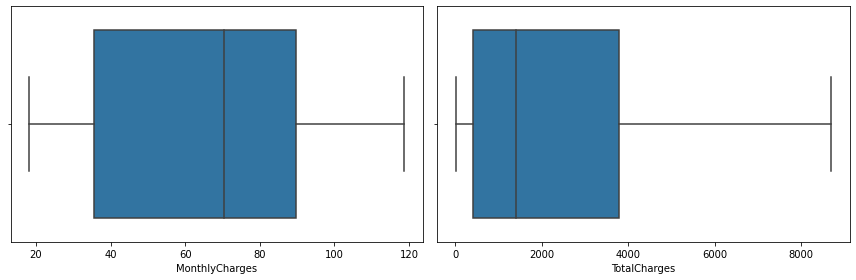

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(dados_clean['MonthlyCharges'], ax=ax[0])
sns.boxplot(dados_clean['TotalCharges'], ax=ax[1])
plt.tight_layout()

Observando o dataframe, a variável `Tenure` está relacionada ao tempo de permanência do cliente em determinado serviço. Ou seja, o tempo de fidelidade.

Iremos assumir que essa variável está sendo mostrada com a unidade de tempo mensal, mesmo sem nenhuma documentação atestando isso.

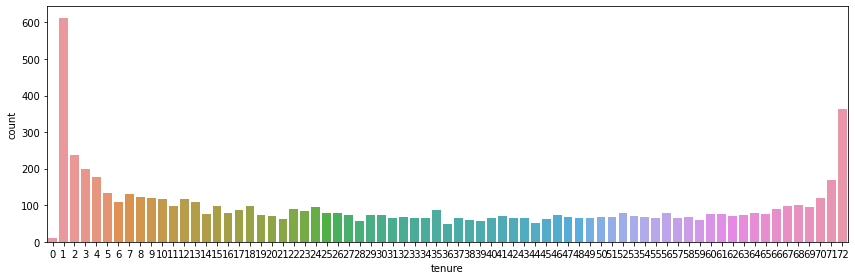

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sns.countplot(dados_clean['tenure'])
plt.tight_layout();

Como estou lidando com variáveis categóricas, é muito importante avaliar os valores únicos, algumas dessas variáveis pode identificar situações de labels diferentes que informam a mesma coisa.

Pude perceber que os valores `No`, `No phone service` e ` No internet service` como a ausência de um tipo de serviço ou poderia também atribuir todos como a mesma coisa.

Mesmo sendo válida a percepção anterior, irei tratar cada label individualmente. 


In [ ]:
# Verificando valores únicos das variáveis categóricas

np.unique(dados_clean.select_dtypes('object').values)

array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., 'One year',
       'Two year', 'Yes'], dtype=object)

Podemos identificar que a contagem de valores para `Male`e `Female`, que estão relacionadas ao gênero, estão balanceados.

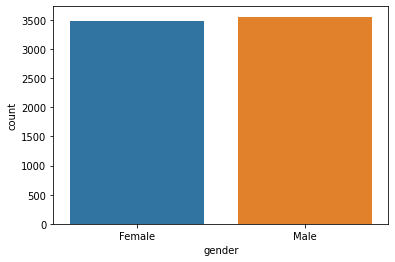

In [ ]:
# Plotando a variável Gender para verificar o balanceamento.

sns.countplot(dados.gender);

Na variável `Churn`, que é a variável Taget, podemos identificar um desbalanceamento. 
É notório que a frequência da classe No é superior a classe Yes, e irei considerar essa diferença na etapa de construção do modelo de Machine Learning.

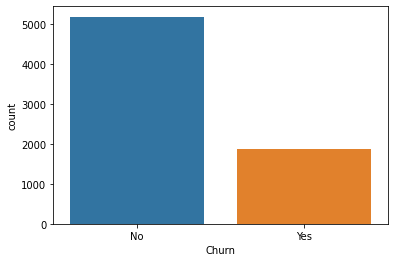

In [ ]:
# Plotando a variável Churn para verificar o balanceamento.
sns.countplot(dados.Churn);

#Preparação dos Dados

Nessa fase será realizado um pré-processamento básico com o intuído de construir um modelo base.

As features que continham 2 labels únicos, serão processados usando o `LabelEncoder`, incluindo o Target, Churn. 


Logo na sequência irei separar as variáveis numéricas das categóricas e esse por sua vez será transformada em `Dummy`  para permitir a utilização da mesma em todos os modelos.


In [ ]:
# Pré processamento das variáveis

varivel_binaria = dados_clean.nunique()[dados_clean.nunique() == 2].keys().tolist()
variavel_numerica = [col for col in dados_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in varivel_binaria]
variavel_categorica = [col for col in dados_clean.columns.tolist() if col not in varivel_binaria + variavel_numerica]

# Criando copia do Data Frame

dados_processados = dados_clean.copy()

# Codificando as variáveis Binárias

le = LabelEncoder()
for i in varivel_binaria:
  dados_processados[i] = le.fit_transform(dados_processados[i])

# Encoding para colunas categóricas com múltiplas classes

dados_processados = pd.get_dummies(dados_processados, columns=variavel_categorica)

# Visualisando as 5 primeiras entradas do novo Data Frame
dados_processados.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


##Modelo de Machine Learning


In [ ]:
# Separando as features matrix do target

X = dados_processados.drop('Churn', axis=1)
y = dados_processados['Churn']

# Dividindo os dados em dados de treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y)

Para estimar o erro de baseline e dos modelos iniciais irei utilizar a cross-validation. No intuito de melhorar e facilitar o código, foi criada a função validacao_modelo. Irei utilizar o `recall`como métrica de avaliação.

In [ ]:
def validacao_modelo(X, y, clf, quite=False):
  """
  Realizar a cross-validation com os dados de treino para determinado modelo.

  # Arguments
    X: DataFrame, contém as variáveis independentes.
    y: Séries, vetor contendo o Target.
    clf: modelo classificador do Scikit-Learn.
    quite: bool, indicando se a função deve imprimir ou não.
  # Returns
    float, média dos scores da cross-validation
    """

  X = np.array(X)
  y = np.array(y)

  pipeline = make_pipeline(StandardScaler(), clf)
  scores = cross_val_score(pipeline, X, y, scoring='recall')

  if quite == False:
    print(f'Recall: {scores.mean():.2f} (+/- {scores.std():.2f})')

  return scores.mean()    

Para o baseline inicial irei usar o Random Forest sem alterar os parâmetros. Os dados que serão passados são os de treino.

In [ ]:
# Criando baseline e obsersando o desempenho

rf = RandomForestClassifier()
score_baseline = validacao_modelo(X_train, y_train, rf)

Recall: 0.48 (+/- 0.02)


Irei realizar o balanceamento dos dados e fazer a avaliação para verificar qual impacto esse processo irá trazer.

Irei utilizar para o balanceamento as técnicas de Over Sampling e Under Sampling no intuito de entender qual dos dois métodos trará o resultado mais satisfatorio.

Irei também fazer a padronização dos dados de treino antes do balanceamento.

In [ ]:
# Padronizando os dados

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# Método SMOTE (Oversample)

oversample = SMOTE(sampling_strategy='minority')
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

# Método Random Under Sampler

rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

Podemos verificar como ficou a distribuição dos dados após utilizar as técnicas de balanceamento

In [ ]:
print(f'A distribuição dos dados do Target após a separação dos dados ficou assim: ')
print(f'{y_train.shape[0]} entradas no total')
print(f'{np.unique(y_train, return_counts=True)[1][0]} entradas classificadas como No')
print(f'{np.unique(y_train, return_counts=True)[1][1]} entradas classificadas como Yes \n')

print(f'A distribuição dos dados do Target após o balanceamento usando TOMEK ficou assim: ')
print(f'{y_train_smote.shape[0]} entradas no total')
print(f'{np.unique(y_train_smote, return_counts=True)[1][0]} entradas classificadas como No')
print(f'{np.unique(y_train_smote, return_counts=True)[1][1]} entradas classificadas como Yes \n')

print(f'A distribuição dos dados do Target após o balanceamento usando Random UnderSampler ficou assim:')
print(f'{y_train_rus.shape[0]} entradas no total')
print(f'{np.unique(y_train_rus, return_counts=True)[1][0]} entradas classificadas como No')
print(f'{np.unique(y_train_rus, return_counts=True)[1][1]} entradas classificadas como Yes')

A distribuição dos dados do Target após a separação dos dados ficou assim: 
5282 entradas no total
3852 entradas classificadas como No
1430 entradas classificadas como Yes 

A distribuição dos dados do Target após o balanceamento usando TOMEK ficou assim: 
7704 entradas no total
3852 entradas classificadas como No
3852 entradas classificadas como Yes 

A distribuição dos dados do Target após o balanceamento usando Random UnderSampler ficou assim:
2860 entradas no total
1430 entradas classificadas como No
1430 entradas classificadas como Yes


Agora aplicarei o método de validação cruzada a vários modelos, no intuito de identificar seu desempenho e escolher o(s) melhor(es). Continuarei utilizando os dados de teste. Os modelos que irei usar são:

* Random Forest

* Decision Tree

* Stochastic Gradiente Descent

* SVC

* Logistic Regression

* LightGBM

In [ ]:
from sklearn import svm

# Instanciando os modelos

rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model_smote = []
recall_smote = []
model_rus = []
recall_rus = []

# Avaliando o desempenho SMOTE

for clf in (rf, dt, sgdc, lr, svc, xgb, lgbm):
  model_smote.append(clf.__class__.__name__)
  recall_smote.append(validacao_modelo(X_train_smote, y_train_smote, clf, quite=True))

# Avaliando o desempenho Random UnderSample

for clf in (rf, dt, sgdc, lr, svc, xgb, lgbm):
  model_rus.append(clf.__class__.__name__)
  recall_rus.append(validacao_modelo(X_train_rus, y_train_rus, clf, quite=True))  

  

In [ ]:
pd.DataFrame(data=recall_smote, index=model_smote, columns=['Recall - Smote'])

,Recall - Smote
RandomForestClassifier,0.902981
DecisionTreeClassifier,0.841986
SGDClassifier,0.971466
LogisticRegression,0.993515
SVC,0.780285
XGBClassifier,0.854705
LGBMClassifier,0.835522


In [ ]:
pd.DataFrame(data=recall_rus, index=model_rus, columns=['Recall - Random'])  

,Recall - Random
RandomForestClassifier,0.781119
DecisionTreeClassifier,0.715385
SGDClassifier,0.758042
LogisticRegression,0.802797
SVC,0.000000
XGBClassifier,0.789510
LGBMClassifier,0.753846


##Modelo Final

Irei utilizar o XGBoost com os dados de teste para o modelo final tendo em vista que é modelo que apresentou o melhor, utilizando a métrica de recall, na qual assumir como única métrica para esse modelo. 

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1307
           1       0.51      0.81      0.63       454

    accuracy                           0.75      1761
   macro avg       0.71      0.77      0.72      1761
weighted avg       0.81      0.75      0.76      1761

AUC: 0.7698



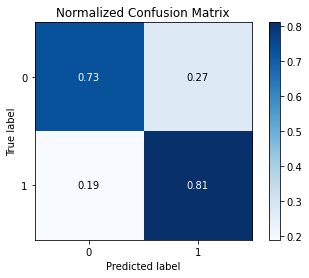

In [ ]:
# Modelo final com dados balanceados com Random Under Sampler
xgb = XGBClassifier()
xgb.fit(X_train_rus, y_train_rus)

# Fazendo a previsão
X_test = scaler.transform(X_test)
y_pred = xgb.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Imprimindo a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# Plotando matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


              precision    recall  f1-score   support

           0       0.96      0.33      0.49      1307
           1       0.33      0.96      0.50       454

    accuracy                           0.49      1761
   macro avg       0.65      0.65      0.49      1761
weighted avg       0.80      0.49      0.49      1761

AUC: 0.6469



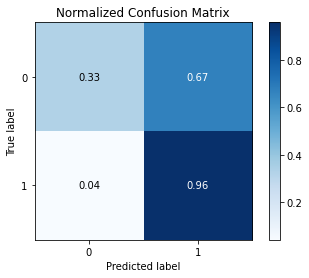

In [ ]:
# Modelo final com dados balanceados com SMOTE
xgb = XGBClassifier()
xgb.fit(X_train_smote, y_train_smote)

# fazer a previsão
X_test = scaler.transform(X_test)
y_pred = xgb.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotar matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

#Conclusões

Pude verificar que durante a execução dos algoritimos, os resultados ficaram muito mais expressivos e com os dados balanceados com o método SMOTE na qual a Regressão Logística apresentou um resultado de quase 99%.

Ainda podem ser utilizados ajustes de tunning para melhorar o desempenho de alguns modelos e também utilizar outras técnicas de balanceamento e outras técnicas de Machine Learning como feature engineering e feature selection.

* Por fim, pensando no negócio como um todo, algumas ações devem ser tomadas no intuído de manter essa taxa de Churn o mais baixa possível:

* Ter um time de Customer Sucess bem coeso e bem capacitado tecnicamente sendo ela responsável pela experiência do cliente e terá o primeiro contato em caso de cancelamento de serviços;
Ofertar vantagens para os clientes, principalmente aqueles que já foram identificados como potenciais desistente da empresa;

* Aumentar o engajamento e surpreender os clientes no intuído de manter a empresa mais perto do cliente e mostrá-lo que ela se importa e com pequenos gestos já se tem uma diferença;

* A empresa deve se manter atenta a toda e qualquer reclamação, pois esses são indícios fortes de um potencial indicativo de desistência e através dessas reclamações a empresa pode entender quais problemas estão afetando e suas principais causas e trabalhar em cimas dessas com o proposito de melhoria de seus produtos focados no que o cliente precisa. 



